In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import os
import datetime

device = torch.device("cuda:0")

path = "./车辆分类数据集/bus/bus001.jpg"
train_features = torch.Tensor(np.array(Image.open(path).resize((100,100),Image.ANTIALIAS))/255).view(1, 100, 100, 3)
test_features = torch.Tensor(np.array(Image.open(path).resize((100,100),Image.ANTIALIAS))/255).view(1, 100, 100, 3)

# 处理客车数据，总共218张，前153张为训练集，后65张为测试集
pic_num = 0
for filename in os.listdir("./车辆分类数据集/bus/"): 
    pic_num = pic_num + 1
    path = "./车辆分类数据集/bus/"+ filename
    img = torch.Tensor(np.array(Image.open(path).resize((100,100),Image.ANTIALIAS))/255).view(1, 100, 100, 3)
    if pic_num <= 153:
        train_features = torch.cat((train_features,img), dim=0)
    else:
        test_features = torch.cat((test_features,img), dim=0)

# 处理汽车数据，总共779张，前545张为训练集，后234张为测试集
pic_num = 0
for filename in os.listdir("./车辆分类数据集/car/"): 
    pic_num = pic_num + 1
    path = "./车辆分类数据集/car/"+ filename
    img = torch.Tensor(np.array(Image.open(path).resize((100,100),Image.ANTIALIAS))/255).view(1, 100, 100, 3)
    if pic_num <= 545:
        train_features = torch.cat((train_features,img), dim=0)
    else:
        test_features = torch.cat((test_features,img), dim=0)

# 处理货车数据，总共360张，前252张为训练集，后108张为测试集
pic_num = 0
for filename in os.listdir("./车辆分类数据集/truck/"): 
    pic_num = pic_num + 1
    path = "./车辆分类数据集/truck/"+ filename
    img = torch.Tensor(np.array(Image.open(path).resize((100,100),Image.ANTIALIAS))/255).view(1, 100, 100, 3)
    if pic_num <= 252:
        train_features = torch.cat((train_features,img), dim=0)
    else:
        test_features = torch.cat((test_features,img), dim=0)

train_features = train_features.permute(0,3,2,1)
test_features = test_features.permute(0,3,2,1)
print(train_features.shape)
print(test_features.shape)

# =================== 训练集标签 =================== #
train_labels = torch.zeros(154).long()
train_labels = torch.cat((train_labels,torch.ones(545).long()), dim=0)
train_labels = torch.cat((train_labels,torch.ones(252).long()+1), dim=0)
print(train_labels.shape)

# =================== 测试集标签 =================== #
test_labels = torch.zeros(66).long()
test_labels = torch.cat((test_labels,torch.ones(234).long()), dim=0)
test_labels = torch.cat((test_labels,torch.ones(108).long()+1), dim=0)
print(test_labels.shape)

torch.Size([951, 3, 100, 100])
torch.Size([408, 3, 100, 100])
torch.Size([951])
torch.Size([408])


In [7]:
# ==================== [1, 2, 3] ==================== #
class DilatedConvModule_1 (torch.nn.Module):
    def __init__(self):
        super(DilatedConvModule_1, self).__init__()
        #定义一个三层卷积
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=0, dilation=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True), 
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0, dilation=2),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0, dilation=3),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True) 
        )
        self.fc = nn.Linear(128, num_classes) #[32,3] ,32是卷积输出的通道数，out_channels是多少这里就是多少
 
    def forward(self, X):
        out = self.conv(X)
        #print(out.shape)  #torch.Size([32, 32, 84, 84])
        out = nn.functional.avg_pool2d(out, 84)
        #print(out.shape) #torch.Size([32, 32, 1, 1])
        out = out.squeeze()
        #print(out.shape) #torch.Size([32, 32])
        out = self.fc(out)
        return out

# ==================== [1, 2, 5] ==================== #
class DilatedConvModule_2 (torch.nn.Module):
    def __init__(self):
        super(DilatedConvModule_2, self).__init__()
        #定义一个三层卷积
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=0, dilation=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True), 
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0, dilation=2),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0, dilation=5),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True) 
        )
        self.fc = nn.Linear(128, num_classes) #[32,3] ,32是卷积输出的通道数，out_channels是多少这里就是多少
 
    def forward(self, X):
        out = self.conv(X)
        #print(out.shape)  #torch.Size([32, 32, 84, 84])
        out = nn.functional.avg_pool2d(out, 84)
        #print(out.shape) #torch.Size([32, 32, 1, 1])
        out = out.squeeze()
        #print(out.shape) #torch.Size([32, 32])
        out = self.fc(out)
        return out
    
# ==================== [3, 4, 5] ==================== #
class DilatedConvModule_3 (torch.nn.Module):
    def __init__(self):
        super(DilatedConvModule_3, self).__init__()
        #定义一个三层卷积
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=0, dilation=3),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True), 
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0, dilation=4),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0, dilation=5),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True) 
        )
        self.fc = nn.Linear(128, num_classes) #[32,3] ,32是卷积输出的通道数，out_channels是多少这里就是多少
 
    def forward(self, X):
        out = self.conv(X)
        #print(out.shape)  #torch.Size([32, 32, 84, 84])
        out = nn.functional.avg_pool2d(out, 76)
        #print(out.shape) #torch.Size([32, 32, 1, 1])
        out = out.squeeze()
        #print(out.shape) #torch.Size([32, 32])
        out = self.fc(out)
        return out

In [3]:
#训练函数
def train_epoch(net, data_loader, device):
    
    net.train()
    train_batch_num = len(data_loader)
    total_loss = 0
    correct = 0
    sample_num = 0
    
    for batch_idx, (data, target) in enumerate(data_loader):
        data = data.to(device).float()
        target = target.to(device).long()
        optimizer.zero_grad()
        output = net(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        prediction = torch.argmax(output, 1)
        correct += (prediction == target).sum().item()
        sample_num += len(prediction)
    
    loss = total_loss / train_batch_num
    acc = correct / sample_num
    return loss, acc

#测试函数
def test_epoch(net, data_loader, device):
    
    net.eval()
    test_batch_num = len(data_loader)
    total_loss = 0
    correct = 0
    sample_num = 0
    
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(data_loader):
            data = data.to(device).float()
            target = target.to(device).long()
            output = net(data)
            loss = criterion(output, target)
            total_loss += loss.item()
            prediction = torch.argmax(output, 1)
            correct += (prediction == target).sum().item()
            sample_num += len(prediction)
    
    loss = total_loss / test_batch_num
    acc = correct / sample_num
    return loss, acc

num_classes = 3
num_epoch = 20
lr = 0.001
batch_size = 128

#划分数据集
train_dataset = torch.utils.data.TensorDataset(train_features,train_labels)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True, num_workers=0)
test_dataset = torch.utils.data.TensorDataset(test_features,test_labels)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size, shuffle=True, num_workers=0)

In [4]:
# ==================== [1, 2, 3] ==================== #

net = DilatedConvModule_1().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

train_loss_1 = []
train_acc_1 = []
test_loss_1 = []
test_acc_1 = []

start = datetime.datetime.now()
for epoch in range(num_epoch):
    
    train_loss, train_acc = train_epoch(net, train_iter, device)
    test_loss, test_acc = test_epoch(net, test_iter, device)
    
    train_loss_1.append(train_loss)
    train_acc_1.append(train_acc)
    test_loss_1.append(test_loss)
    test_acc_1.append(test_acc)
    
    print('epoch %d, train_loss %f, test_loss %f, train_acc %f, test_acc %f' % 
          (epoch+1, train_loss, test_loss, train_acc, test_acc))
end = datetime.datetime.now()
print("空洞卷积[1, 2, 3]执行时间：")
print(end - start)

epoch 1, train_loss 0.857914, test_loss 1.126840, train_acc 0.637224, test_acc 0.267157
epoch 2, train_loss 0.592212, test_loss 1.135352, train_acc 0.812829, test_acc 0.372549
epoch 3, train_loss 0.511629, test_loss 1.398463, train_acc 0.838065, test_acc 0.384804
epoch 4, train_loss 0.464888, test_loss 1.050188, train_acc 0.839117, test_acc 0.571078
epoch 5, train_loss 0.418040, test_loss 0.685522, train_acc 0.855941, test_acc 0.686275
epoch 6, train_loss 0.381091, test_loss 0.659115, train_acc 0.867508, test_acc 0.776961
epoch 7, train_loss 0.351346, test_loss 0.585639, train_acc 0.868559, test_acc 0.769608
epoch 8, train_loss 0.357892, test_loss 0.586512, train_acc 0.876972, test_acc 0.769608
epoch 9, train_loss 0.333313, test_loss 0.517410, train_acc 0.887487, test_acc 0.786765
epoch 10, train_loss 0.326689, test_loss 0.338950, train_acc 0.889590, test_acc 0.887255
epoch 11, train_loss 0.310924, test_loss 0.752788, train_acc 0.895899, test_acc 0.754902
epoch 12, train_loss 0.303772,

In [5]:
# ==================== [1, 2, 5] ==================== #

net = DilatedConvModule_2().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

train_loss_2 = []
train_acc_2 = []
test_loss_2 = []
test_acc_2 = []

start1 = datetime.datetime.now()
for epoch in range(num_epoch):
    
    train_loss, train_acc = train_epoch(net, train_iter, device)
    test_loss, test_acc = test_epoch(net, test_iter, device)
    
    train_loss_2.append(train_loss)
    train_acc_2.append(train_acc)
    test_loss_2.append(test_loss)
    test_acc_2.append(test_acc)
    
    print('epoch %d, train_loss %f, test_loss %f, train_acc %f, test_acc %f' % 
          (epoch+1, train_loss, test_loss, train_acc, test_acc))
end1 = datetime.datetime.now()
print("空洞卷积[1, 2, 5]执行时间：")
print(end1 - start1)

epoch 1, train_loss 0.752632, test_loss 1.023084, train_acc 0.737119, test_acc 0.426471
epoch 2, train_loss 0.562660, test_loss 1.152508, train_acc 0.826498, test_acc 0.414216
epoch 3, train_loss 0.479370, test_loss 1.450672, train_acc 0.851735, test_acc 0.394608
epoch 4, train_loss 0.427584, test_loss 1.089395, train_acc 0.845426, test_acc 0.583333
epoch 5, train_loss 0.403627, test_loss 0.736390, train_acc 0.863302, test_acc 0.676471
epoch 6, train_loss 0.368149, test_loss 0.474249, train_acc 0.869611, test_acc 0.794118
epoch 7, train_loss 0.351649, test_loss 0.584904, train_acc 0.879075, test_acc 0.789216
epoch 8, train_loss 0.322727, test_loss 0.538174, train_acc 0.892744, test_acc 0.799020
epoch 9, train_loss 0.307637, test_loss 0.389403, train_acc 0.892744, test_acc 0.855392
epoch 10, train_loss 0.295139, test_loss 0.912042, train_acc 0.896951, test_acc 0.710784
epoch 11, train_loss 0.300433, test_loss 0.513432, train_acc 0.894848, test_acc 0.818627
epoch 12, train_loss 0.273456,

In [8]:
# ==================== [3, 4, 5] ==================== #

net = DilatedConvModule_3().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

train_loss_3 = []
train_acc_3 = []
test_loss_3 = []
test_acc_3 = []

start3 = datetime.datetime.now()
for epoch in range(num_epoch):
    
    train_loss, train_acc = train_epoch(net, train_iter, device)
    test_loss, test_acc = test_epoch(net, test_iter, device)
    
    train_loss_3.append(train_loss)
    train_acc_3.append(train_acc)
    test_loss_3.append(test_loss)
    test_acc_3.append(test_acc)
    
    print('epoch %d, train_loss %f, test_loss %f, train_acc %f, test_acc %f' % 
          (epoch+1, train_loss, test_loss, train_acc, test_acc))
end3 = datetime.datetime.now()
print("空洞卷积[3, 4, 5]执行时间：")
print(end3 - start3)

epoch 1, train_loss 0.796898, test_loss 1.291083, train_acc 0.644585, test_acc 0.264706
epoch 2, train_loss 0.546691, test_loss 1.629273, train_acc 0.811777, test_acc 0.264706
epoch 3, train_loss 0.481664, test_loss 2.004945, train_acc 0.843323, test_acc 0.264706
epoch 4, train_loss 0.423468, test_loss 2.027864, train_acc 0.849632, test_acc 0.306373
epoch 5, train_loss 0.388675, test_loss 1.175261, train_acc 0.863302, test_acc 0.539216
epoch 6, train_loss 0.369852, test_loss 1.030073, train_acc 0.867508, test_acc 0.605392
epoch 7, train_loss 0.356107, test_loss 0.402768, train_acc 0.864353, test_acc 0.862745
epoch 8, train_loss 0.322003, test_loss 0.430489, train_acc 0.885384, test_acc 0.865196
epoch 9, train_loss 0.291385, test_loss 0.415682, train_acc 0.892744, test_acc 0.862745
epoch 10, train_loss 0.272286, test_loss 0.349054, train_acc 0.904311, test_acc 0.882353
epoch 11, train_loss 0.269690, test_loss 0.751961, train_acc 0.914826, test_acc 0.740196
epoch 12, train_loss 0.267882,

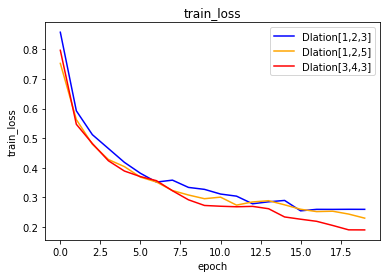

In [9]:
plt.plot(train_loss_1 ,label='Dlation[1,2,3]',color='blue')
plt.plot(train_loss_2 ,label='Dlation[1,2,5]', color='orange')
plt.plot(train_loss_3 ,label='Dlation[3,4,5]', color='red')
plt.ylabel("train_loss")
plt.xlabel("epoch")
plt.title("train_loss")
plt.legend()
plt.show()

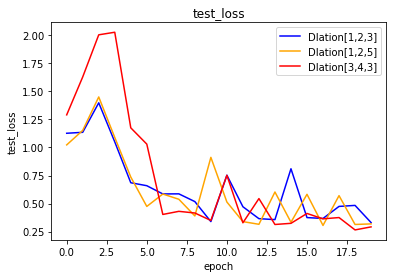

In [10]:
plt.plot(test_loss_1 ,label='Dlation[1,2,3]',color='blue')
plt.plot(test_loss_2 ,label='Dlation[1,2,5]', color='orange')
plt.plot(test_loss_3 ,label='Dlation[3,4,5]', color='red')
plt.ylabel("test_loss")
plt.xlabel("epoch")
plt.title("test_loss")
plt.legend()
plt.show()

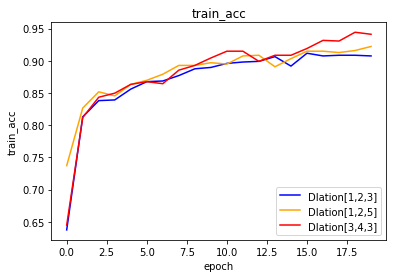

In [11]:
plt.plot(train_acc_1 ,label='Dlation[1,2,3]',color='blue')
plt.plot(train_acc_2 ,label='Dlation[1,2,5]', color='orange')
plt.plot(train_acc_3 ,label='Dlation[3,4,5]', color='red')
plt.ylabel("train_acc")
plt.xlabel("epoch")
plt.title("train_acc")
plt.legend()
plt.show()

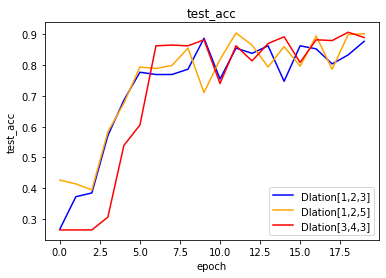

In [12]:
plt.plot(test_acc_1 ,label='Dlation[1,2,3]',color='blue')
plt.plot(test_acc_2 ,label='Dlation[1,2,5]', color='orange')
plt.plot(test_acc_3 ,label='Dlation[3,4,5]', color='red')
plt.ylabel("test_acc")
plt.xlabel("epoch")
plt.title("test_acc")
plt.legend()
plt.show()